### Module Assignment 2

##### I decided to look at expenses between parties 

In [50]:
# reading in all necessary libraries 

import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb

In [4]:
# I decided to look at 2020 q4 data from the website 
house_20q4_df = pd.read_csv('2020Q4-house-disburse-detail.csv')
house_20q4_df.sample(5)

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
19319,C001062,2020 HON. K. MICHAEL CONAWAY,4,OFFICIAL EXPENSES OF MEMBERS,OTHER SERVICES,DETAIL,2020-11-25,AP,1358344,FIRESIDE21,2020-11-23,2020-11-23,TECHNOLOGY SERVICE CONTRACTS,500.00,2020
39462,J000295,2020 HON. DAVID P. JOYCE,4,OFFICIAL EXPENSES OF MEMBERS,PERSONNEL COMPENSATION,DETAIL,,,,BURGER KATALYN M,2020-10-01,2020-12-31,DISTRICT OUTREACH REP,14500.00,2020
9642,B001306,2020 HON. TROY BALDERSON,4,OFFICIAL EXPENSES OF MEMBERS,RENT COMMUNICATION UTILITIES,DETAIL,2020-12-28,GL,EMS0103149,,2020-11-01,2020-11-30,DC TELECOM EQUIP (TRANSFER),166.06,2020
81263,NaN,FISCAL YEAR 2021 GOVERNMENT CONTRIBUTIONS,4,GOVERNMENT CONTRIBUTIONS,PERSONNEL BENEFITS,DETAIL,2020-10-16,AP,1345518,DEPT OF EDUC VIA FEDLOAN SVC,2020-10-01,2020-10-31,STUDENT LOANS,833.00,2020
74710,W000795,2020 HON. JOE WILSON,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-12-24,AP,1369093,UNITED STATES POSTAL SERVICE,2020-11-01,2020-11-30,FRANKED MAIL,555.96,2020


In [48]:
c0 = house_20q4_df['SORT SEQUENCE'] == 'DETAIL'
c1 = house_20q4_df['BIOGUIDE_ID'].notnull()

# Then pass to boolean index
house_20q4_clean_df = house_20q4_df[c0 & c1]

house_20q4_clean_df.head()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
7290,A000374,2020 HON. RALPH LEE ABRAHAM,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-10-27,AP,1347818,UNITED STATES POSTAL SERVICE,2020-09-01,2020-09-30,FRANKED MAIL,213.14,2020
7291,A000374,2020 HON. RALPH LEE ABRAHAM,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-10-30,GL,FLG0101923,,2020-10-20,2020-10-31,FRANKED MAIL,-64.95,2020
7292,A000374,2020 HON. RALPH LEE ABRAHAM,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-11-30,AP,1358522,UNITED STATES POSTAL SERVICE,2020-10-01,2020-10-31,FRANKED MAIL,151.46,2020
7293,A000374,2020 HON. RALPH LEE ABRAHAM,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-11-30,GL,FLG0102571,,2020-11-20,2020-11-30,FRANKED MAIL,-31.40,2020
7294,A000374,2020 HON. RALPH LEE ABRAHAM,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-12-24,AP,1369093,UNITED STATES POSTAL SERVICE,2020-11-01,2020-11-30,FRANKED MAIL,162.11,2020


In [49]:
members_df = pd.read_csv('house_members.csv')

members_df.head()

,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,"Young, Don",Y000033,Young,Don,NaN,"YOUNG,DON",NaN,Mr.,116,Don Young,Mr. Young,R,R,NaN,At Large,Fort Yukon,RHOB,2314,20515,200,(202) 225-5765,"November 3, 2020","January 3, 2021",NaN,NaN,AK,Alaska,AK00
1,"Carl, Jerry",C001054,Carl,Jerry,L.,"CARL,JERRY",NaN,Mr.,0,Jerry L. Carl,Mr. Carl,R,R,NaN,1st,Mobile,LHOB,1330,20515,101,(202) 225-4931,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL01
2,"Moore, Barry",M001212,Moore,Barry,NaN,"MOORE,BARRY",NaN,Mr.,0,Barry Moore,Mr. Moore of Alabama,R,R,NaN,2nd,Enterprise,LHOB,1504,20515,102,(202) 225-2901,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL02
3,"Rogers, Mike",R000575,Rogers,Mike,NaN,"ROGERS,MIKE",NaN,Mr.,116,Mike Rogers,Mr. Rogers of Alabama,R,R,NaN,3rd,Anniston,RHOB,2469,20515,103,(202) 225-3261,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL03
4,"Aderholt, Robert",A000055,Aderholt,Robert,B.,"ADERHOLT,ROBERT",NaN,Mr.,116,Robert B. Aderholt,Mr. Aderholt,R,R,NaN,4th,Haleyville,CHOB,266,20515,104,(202) 225-4876,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL04


In [89]:
joined_df = pd.merge(
    left = house_20q4_clean_df,
    right = members_df,
    left_on = 'BIOGUIDE_ID',
    right_on = 'bioguideID',
    how = 'inner'
)

joined_df

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-10-27,AP,1347818,UNITED STATES POSTAL SERVICE,2020-09-01,2020-09-30,FRANKED MAIL,34.47,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
1,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-10-30,GL,FLG0101923,,2020-10-20,2020-10-31,FRANKED MAIL,-19.80,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
2,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-11-30,AP,1358522,UNITED STATES POSTAL SERVICE,2020-10-01,2020-10-31,FRANKED MAIL,47.32,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
3,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2020-12-24,AP,1369093,UNITED STATES POSTAL SERVICE,2020-11-01,2020-11-30,FRANKED MAIL,27.27,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
4,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,PERSONNEL COMPENSATION,DETAIL,,,,BARAJAS JOCELYNE,2020-10-01,2020-12-31,LEGISLATIVE CORRESPONDENT,11500.00,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53431,Z000017,2019 HON. LEE M. ZELDIN,4,OFFICIAL EXPENSES OF MEMBERS,SUPPLIES AND MATERIALS,DETAIL,2020-10-02,AP,1338980,CITI PCARD-L I BUSINESS NEWS SUBSCR,2019-04-12,2019-04-12,PUBLICATIONS/REFERENCE MAT'L,-88.21,2020,"Zeldin, Lee",Z000017,Zeldin,Lee,M.,"ZELDIN,LEE",NaN,Mr.,116,Lee M. Zeldin,Mr. Zeldin,R,R,NaN,1st,Shirley,RHOB,2441,20515,3201,(202) 225-3826,"November 3, 2020","January 3, 2021",NaN,NaN,NY,New York,NY01
53432,Z000017,2019 HON. LEE M. ZELDIN,4,OFFICIAL EXPENSES OF MEMBERS,SUPPLIES AND MATERIALS,DETAIL,2020-10-02,AP,1338980,CITI PCARD-OFFICEMAX/OFFICEDEPT#6871,2019-11-21,2019-11-21,OFFICE SUPPLIES (OUTSIDE),-122.97,2020,"Zeldin, Lee",Z000017,Zeldin,Lee,M.,"ZELDIN,LEE",NaN,Mr.,116,Lee M. Zeldin,Mr. Zeldin,R,R,NaN,1st,Shirley,RHOB,2441,20515,3201,(202) 225-3826,"November 3, 2020","January 3, 2021",NaN,NaN,NY,New York,NY01
53433,Z000017,2019 HON. LEE M. ZELDIN,4,OFFICIAL EXPENSES OF MEMBERS,SUPPLIES AND MATERIALS,DETAIL,2020-10-02,AP,1338980,CITI PCARD-OFFICEMAX/OFFICEDEPT#6871,2019-12-26,2019-12-26,OFFICE SUPPLIES (OUTSIDE),1.46,2020,"Zeldin, Lee",Z000017,Zeldin,Lee,M.,"ZELDIN,LEE",NaN,Mr.,116,Lee M. Zeldin,Mr. Zeldin,R,R,NaN,1st,Shirley,RHOB,2441,20515,3201,(202) 225-3826,"November 3, 2020","January 3, 2021",NaN,NaN,NY,New York,NY01
53434,Z000017,2020 HON. LEE M. ZELDIN,4,INTERN ALLOWANCES,PERSONNEL COMPENSATION,DETAIL,,,,BROWN KEITH J.,2020-10-01,2020-12-31,DISTRICT OFFICE PAID INTERN -,5000.01,2020,"Zeldin, Lee

In [92]:
# creating a df for categories just relating to travel to look at just travel expenses 

travel2020df = joined_df[joined_df['CATEGORY'] == 'TRAVEL']
travel2020df

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
25,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-10-01,AP,1338918,CLOUD MONICA R.,2020-03-04,2020-03-10,TAXI/PARKING/TOLLS,55.00,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
26,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-10-02,AP,1339272,CITIBANK GOV CARD SERVICE,2020-09-25,2020-09-25,MEALS,7.36,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
27,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-10-06,AP,1338898,BROWN SANDRA A.,2020-09-02,2020-09-18,MEALS,148.28,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
28,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-10-06,AP,1338898,BROWN SANDRA A.,2020-09-02,2020-09-30,PRIVATE AUTO MILEAGE,1954.66,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
29,A000370,2020 HON. ALMA S. ADAMS,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-10-07,AP,1339932,BONIFATI AVERY J.,2020-09-10,2020-10-14,PRIVATE AUTO MILEAGE,3.45,2020,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53312,Z000017,2020 HON. LEE M. ZELDIN,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-12-14,AP,1362002,CITIBANK GOV CARD SERVICE,2020-12-02,2020-12-02,COMMERCIAL TRANSPORTATION,54.10,2020,"Zeldin, Lee",Z000017,Zeldin,Lee,M.,"ZELDIN,LEE",NaN,Mr.,116,Lee M. Zeldin,Mr. Zeldin,R,R,NaN,1st,Shirley,RHOB,2441,20515,3201,(202) 225-3826,"November 3, 2020","January 3, 2021",NaN,NaN,NY,New York,NY01
53313,Z000017,2020 HON. LEE M. ZELDIN,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-12-14,AP,1362011,CITIBANK GOV CARD SERVICE,2020-11-15,2020-11-15,COMMERCIAL TRANSPORTATION,138.98,2020,"Zeldin, Lee",Z000017,Zeldin,Lee,M.,"ZELDIN,LEE",NaN,Mr.,116,Lee M. Zeldin,Mr. Zeldin,R,R,NaN,1st,Shirley,RHOB,2441,20515,3201,(202) 225-3826,"November 3, 2020","January 3, 2021",NaN,NaN,NY,New York,NY01
53314,Z000017,2020 HON. LEE M. ZELDIN,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-12-14,AP,1362011,CITIBANK GOV CARD SERVICE,2020-11-18,2020-11-18,COMMERCIAL TRANSPORTATION,138.98,2020,"Zeldin, Lee",Z000017,Zeldin,Lee,M.,"ZELDIN,LEE",NaN,Mr.,116,Lee M. Zeldin,Mr. Zeldin,R,R,NaN,1st,Shirley,RHOB,2441,20515,3201,(202) 225-3826,"November 3, 2020","January 3, 2021",NaN,NaN,NY,New York,NY01
53315,Z000017,2020 HON. LEE M. ZELDIN,4,OFFICIAL EXPENSES OF MEMBERS,TRAVEL,DETAIL,2020-12-14,AP,1362011,CITIBANK GOV CARD SERVICE,2020-11-15,2020-11-15,TAXI/PARKING/TOLLS,53.97,2020,"Zeldin, Lee",Z000017,Zeldin,Lee,M.,"ZELDIN,LEE",NaN,Mr.,116,Lee M. Zeldin,Mr. Zeldin,R,R,NaN,1st,Shirley,RHOB,2441,20515,3

### Looking at Travel expenses per state 

In [176]:
# Using the travel2020df to only look at the travel expenses 
# creating a new DF called spendingByState to look at each state and their travel expenses compared to 
# per-capita (the average per person travel expenses)

spendingByState = travel2020df.groupby('state-fullname').agg({'AMOUNT':'sum',
                                                'BIOGUIDE_ID':'nunique'}).sort_values(by='AMOUNT',ascending=False)
spendingByState['per_capita'] = spendingByState['AMOUNT']/spendingByState['BIOGUIDE_ID']

spendingByState.head()

,AMOUNT,BIOGUIDE_ID,per_capita
state-fullname,,,
Texas,295437.70,26,11362.988462
California,184109.55,42,4383.560714
Florida,118216.33,19,6221.912105
Michigan,94126.01,12,7843.834167
North Carolina,92644.42,9,10293.824444


In [218]:
# grouping by state and calulating highest (per_capita) for travel by state

spendingByState.sort_values(by='per_capita', ascending = False)

,AMOUNT,BIOGUIDE_ID,per_capita
state-fullname,,,
Virgin Islands,31534.77,1,31534.770000
Alaska,27880.43,1,27880.430000
North Dakota,23525.14,1,23525.140000
Utah,35956.31,2,17978.155000
Idaho,27408.10,2,13704.050000
Kansas,26585.22,2,13292.610000
Oklahoma,49586.84,4,12396.710000
Texas,295437.70,26,11362.988462
American Samoa,11121.68,1,11121.680000


In [136]:
# Just looking at the highest travel expense per state 
# Texas spends the most on travel (surprisngly more than California)
spendingByState.groupby(['state-fullname']).agg({'AMOUNT':'sum'}).sort_values(by = 'AMOUNT', ascending = False)

,AMOUNT
state-fullname,
Texas,295437.70
California,184109.55
Florida,118216.33
Michigan,94126.01
North Carolina,92644.42
Arizona,88301.01
Tennessee,79253.31
New York,71052.77
Ohio,70695.16


## Now, looking at each person in Congress and figuring out who spends the most on travel

##### From below, we can see that the person with the higghest travel expenses is Lance Gooden from Texas, with a total of 46,338.39 for q4 of 2020

In [184]:
# looking at each person in congress for their total travel expenses 
# Robert B. Aderholt is the highest spender when it comes to traveling in Q4 of 2020

individualSpendingByCaucus = travel2020df.groupby(['BIOGUIDE_ID', 'OFFICE', 
                'state-fullname', 'caucus']).agg({'AMOUNT':'sum'}).sort_values(by = 'AMOUNT', ascending = False)
individualSpendingByCaucus.head()

,,,,AMOUNT
BIOGUIDE_ID,OFFICE,state-fullname,caucus,
G000589,2020 HON. LANCE GOODEN,Texas,R,46338.39
B001301,2020 HON. JACK BERGMAN,Michigan,R,44316.36
W000816,2020 HON. ROGER WILLIAMS,Texas,R,38731.78
H001067,2020 HON. RICHARD HUDSON,North Carolina,R,34183.59
C001051,2020 HON. JOHN R. CARTER,Texas,R,32232.99


## Now looking at total expenses per person under travel, but for the specific reason (purpose)

##### From below, Lance Gooden spent most of his travel expenses onp Commercial Transportation, for a total of 28,023

In [264]:
individualTravelPurposeTotal = travel2020df.groupby(['BIOGUIDE_ID', 'OFFICE', 
     'state-fullname', 'caucus', 'PURPOSE']).agg({'AMOUNT':'sum'}).sort_values(by = 'AMOUNT', ascending = False)

individualTravelPurposeTotal.head()

,,,,,AMOUNT
BIOGUIDE_ID,OFFICE,state-fullname,caucus,PURPOSE,
G000589,2020 HON. LANCE GOODEN,Texas,R,COMMERCIAL TRANSPORTATION,28023.82
W000816,2020 HON. ROGER WILLIAMS,Texas,R,PRIVATE AUTO MILEAGE,22441.87
B001301,2020 HON. JACK BERGMAN,Michigan,R,LODGING,18638.63
P000610,2020 HON. STACEY E. PLASKETT,Virgin Islands,D,LODGING,14806.24
B001301,2020 HON. JACK BERGMAN,Michigan,R,CAR RENTAL,13004.31


## Looking at travel spending based off of what party a person may be (looking at total Amount and per_capita

In [225]:
# Calculating total spending, but incase of TRAVEL EXPENSES
totalTravelSpending = travel2020df.groupby('state-fullname').agg({'AMOUNT':'sum'})
totalTravelSpending['per_capita'] = spendingByState['AMOUNT']/spendingByState['BIOGUIDE_ID']

totalTravelSpending

,AMOUNT,per_capita
state-fullname,,
Alabama,36753.14,7350.628000
Alaska,27880.43,27880.430000
American Samoa,11121.68,11121.680000
Arizona,88301.01,9811.223333
Arkansas,36585.41,9146.352500
California,184109.55,4383.560714
Colorado,42932.55,7155.425000
Connecticut,11373.54,2274.708000
District of Columbia,132.94,132.940000


In [227]:
travelSpending_joined = pd.merge(
    left = totalTravelSpending.reset_index(),
    right = members_df,
    left_on = 'state-fullname',
    right_on = 'state-fullname',
    how = 'left'
)

travelSpending_joined.head()

,state-fullname,AMOUNT,per_capita,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,statedistrict
0,Alabama,36753.14,7350.628,"Carl, Jerry",C001054,Carl,Jerry,L.,"CARL,JERRY",NaN,Mr.,0,Jerry L. Carl,Mr. Carl,R,R,NaN,1st,Mobile,LHOB,1330,20515,101,(202) 225-4931,"November 3, 2020","January 3, 2021",NaN,NaN,AL,AL01
1,Alabama,36753.14,7350.628,"Moore, Barry",M001212,Moore,Barry,NaN,"MOORE,BARRY",NaN,Mr.,0,Barry Moore,Mr. Moore of Alabama,R,R,NaN,2nd,Enterprise,LHOB,1504,20515,102,(202) 225-2901,"November 3, 2020","January 3, 2021",NaN,NaN,AL,AL02
2,Alabama,36753.14,7350.628,"Rogers, Mike",R000575,Rogers,Mike,NaN,"ROGERS,MIKE",NaN,Mr.,116,Mike Rogers,Mr. Rogers of Alabama,R,R,NaN,3rd,Anniston,RHOB,2469,20515,103,(202) 225-3261,"November 3, 2020","January 3, 2021",NaN,NaN,AL,AL03
3,Alabama,36753.14,7350.628,"Aderholt, Robert",A000055,Aderholt,Robert,B.,"ADERHOLT,ROBERT",NaN,Mr.,116,Robert B. Aderholt,Mr. Aderholt,R,R,NaN,4th,Haleyville,CHOB,266,20515,104,(202) 225-4876,"November 3, 2020","January 3, 2021",NaN,NaN,AL,AL04
4,Alabama,36753.14,7350.628,"Brooks, Mo",B001274,Brooks,Mo,NaN,"BROOKS,MO",NaN,Mr.,116,Mo Brooks,Mr. Brooks,R,R,NaN,5th,Huntsville,RHOB,2185,20515,105,(202) 225-4801,"November 3, 2020","January 3, 2021",NaN,NaN,AL,AL05


In [238]:
pd.pivot_table(travelSpending_joined,
               index = 'state-fullname', 
               columns = 'caucus', 
               values = 'AMOUNT', 
               aggfunc = 'sum')

caucus,D,R
state-fullname,,
Alabama,36753.14,220518.84
Alaska,NaN,27880.43
American Samoa,NaN,11121.68
Arizona,441505.05,353204.04
Arkansas,NaN,146341.64
California,7732601.10,1841095.50
Colorado,171730.20,128797.65
Connecticut,56867.70,NaN
District of Columbia,132.94,NaN


In [292]:
pd.pivot_table(travelSpending_joined,
               index = 'state-fullname', 
               columns = 'caucus', 
               values = 'per_capita', 
               aggfunc = 'sum')

caucus,D,R
state-fullname,,
Alabama,7350.628000,44103.768000
Alaska,NaN,27880.430000
American Samoa,NaN,11121.680000
Arizona,49056.116667,39244.893333
Arkansas,NaN,36585.410000
California,184109.550000,43835.607143
Colorado,28621.700000,21466.275000
Connecticut,11373.540000,NaN
District of Columbia,132.940000,NaN


In [229]:
# Looking at to see how many members of congress are in each state within the travelSpending_joined df
# From here, I can make an assumption that California spends the most on travel as they have the highest 
# number of members in congress
travelSpending_joined['state-fullname'].value_counts()

California                  53
Texas                       36
Florida                     27
New York                    27
Illinois                    18
Pennsylvania                18
Ohio                        16
Georgia                     14
Michigan                    14
North Carolina              13
New Jersey                  12
Virginia                    11
Washington                  10
Massachusetts                9
Tennessee                    9
Indiana                      9
Arizona                      9
Minnesota                    8
Missouri                     8
Maryland                     8
Wisconsin                    8
South Carolina               7
Alabama                      7
Colorado                     7
Kentucky                     6
Louisiana                    6
Connecticut                  5
Oklahoma                     5
Oregon                       5
Mississippi                  4
Nevada                       4
Arkansas                     4
Kansas  

## Plotting travelSpending_joined DF and the differences between parties and their amounts and per capitas

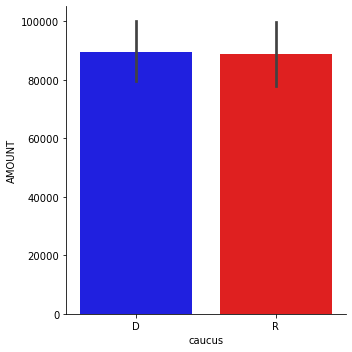

In [289]:
sb.catplot(
    data = travelSpending_joined,
    x = 'caucus',
    y = 'AMOUNT',
    kind = 'bar',
    order = ['D','R'],
    palette = sb.color_palette(['blue','red'])
)

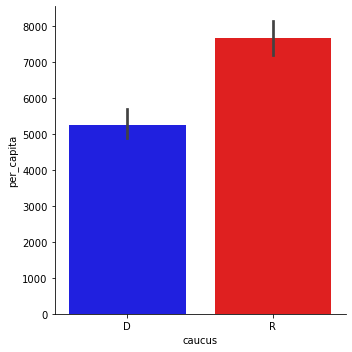

In [290]:
sb.catplot(
    data = travelSpending_joined,
    x = 'caucus',
    y = 'per_capita',
    kind = 'bar',
    order = ['D','R'],
    palette = sb.color_palette(['blue','red'])
)

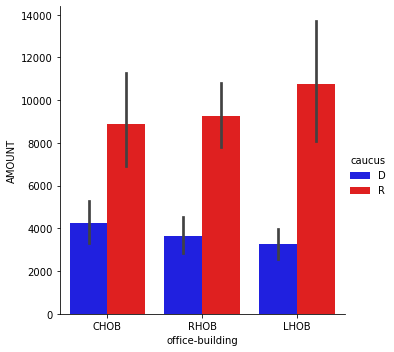

In [210]:
sb.catplot(
    data = travelSpending_joined,
    x = 'office-building',
    y = 'AMOUNT',
    hue = 'caucus',
    kind = 'bar',
    estimator = np.mean,
    hue_order = ['D','R'],
    palette = sb.color_palette(['blue','red'])
)

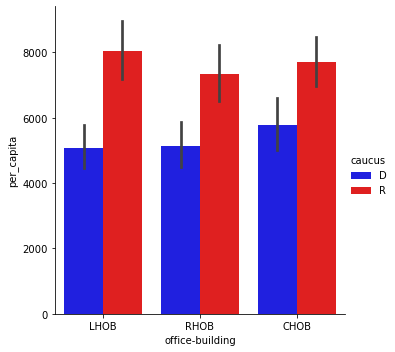

In [239]:
sb.catplot(
    data = travelSpending_joined,
    x = 'office-building',
    y = 'per_capita',
    hue = 'caucus',
    kind = 'bar',
    estimator = np.mean,
    hue_order = ['D','R'],
    palette = sb.color_palette(['blue','red'])
)

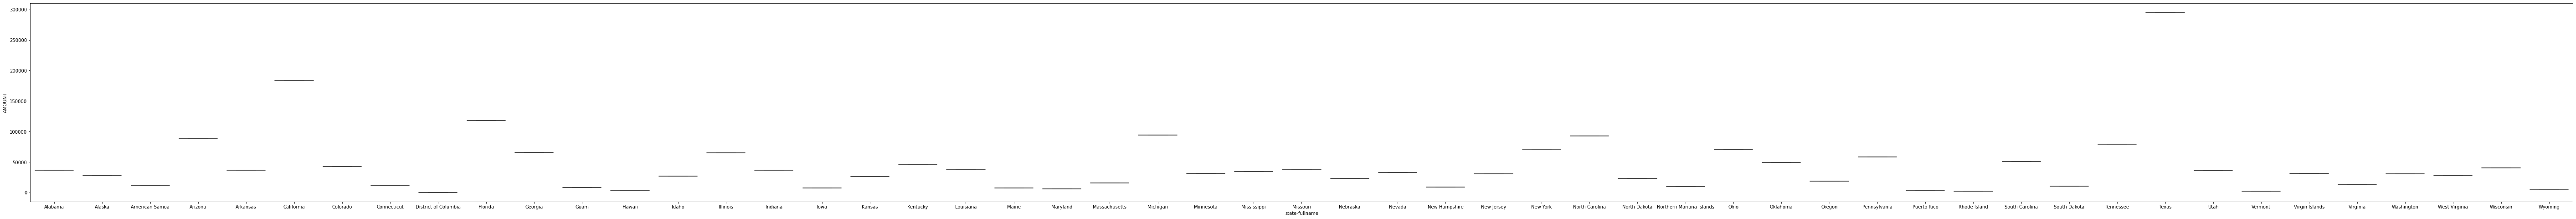

In [253]:
f,ax = plt.subplots(figsize=(100,8))

g = sb.boxplot(
    data = travelSpending_joined,
    x = 'state-fullname',
    y = 'AMOUNT',
    ax=ax
)


In [240]:
dem_transactions = travelSpending_joined.loc[travelSpending_joined['caucus'] == 'D','AMOUNT']
rep_transactions = travelSpending_joined.loc[travelSpending_joined['caucus'] == 'R','AMOUNT']

len(dem_transactions), len(rep_transactions)

(223, 212)

In [241]:
dem_transactions = spending_joined.loc[spending_joined['caucus'] == 'D','AMOUNT']
rep_transactions = spending_joined.loc[spending_joined['caucus'] == 'R','AMOUNT']

len(dem_transactions), len(rep_transactions)

(205, 164)